<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Extract-the-rocks-and-bedrocks" data-toc-modified-id="Extract-the-rocks-and-bedrocks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extract the rocks and bedrocks</a></span></li><li><span><a href="#Edge-detection" data-toc-modified-id="Edge-detection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Edge detection</a></span></li><li><span><a href="#Extracting-the-shadows" data-toc-modified-id="Extracting-the-shadows-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extracting the shadows</a></span></li><li><span><a href="#Comparing-the-two-images-to-segment-rocks-and-bedrocks" data-toc-modified-id="Comparing-the-two-images-to-segment-rocks-and-bedrocks-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparing the two images to segment rocks and bedrocks</a></span><ul class="toc-item"><li><span><a href="#Superimposing-with-contour" data-toc-modified-id="Superimposing-with-contour-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Superimposing with contour</a></span></li><li><span><a href="#Superimposing-with-KNN" data-toc-modified-id="Superimposing-with-KNN-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Superimposing with KNN</a></span></li></ul></li><li><span><a href="#Merging-the-3-classes-in-the-same-image" data-toc-modified-id="Merging-the-3-classes-in-the-same-image-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Merging the 3 classes in the same image</a></span></li><li><span><a href="#Comparing-the-entire-polygon-to-find-the-percentage-of-shadow" data-toc-modified-id="Comparing-the-entire-polygon-to-find-the-percentage-of-shadow-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Comparing the entire polygon to find the percentage of shadow</a></span></li><li><span><a href="#Extract-the-coordinates-of-the-polygons-(detected-contours)" data-toc-modified-id="Extract-the-coordinates-of-the-polygons-(detected-contours)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Extract the coordinates of the polygons (detected contours)</a></span></li></ul></div>

# Load the libraries

In [3]:
# !pip install -U scikit-learn scipy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
from shapely.geometry import MultiPoint
import cv2
from sklearn.cluster import KMeans
import skimage.morphology as morph

# Extract the rocks and bedrocks

threshold value 147


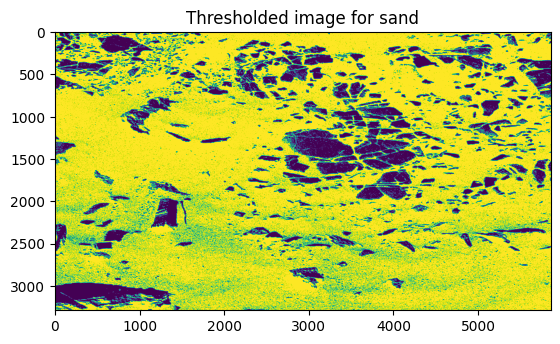

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [4]:
image = cv2.imread("images/cv_test_images_1.png")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

from skimage.filters import threshold_otsu

threshold = threshold_otsu(img)
print("threshold value",threshold)
#Generate thresholded image
thresholded_img = img < threshold
plt.imshow(thresholded_img)
plt.title("Thresholded image for sand")
plt.show()
print(thresholded_img)

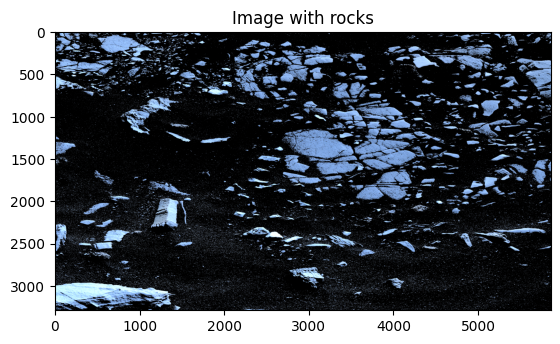

In [5]:
processed_image = image.copy()
for i in range(thresholded_img.shape[0]):
    for j in range(thresholded_img.shape[1]):
        if thresholded_img[i][j] == True:
            processed_image[i][j] = [0, 0, 0]
plt.imshow(processed_image)
plt.title("Image with rocks")
plt.show()

# Edge detection

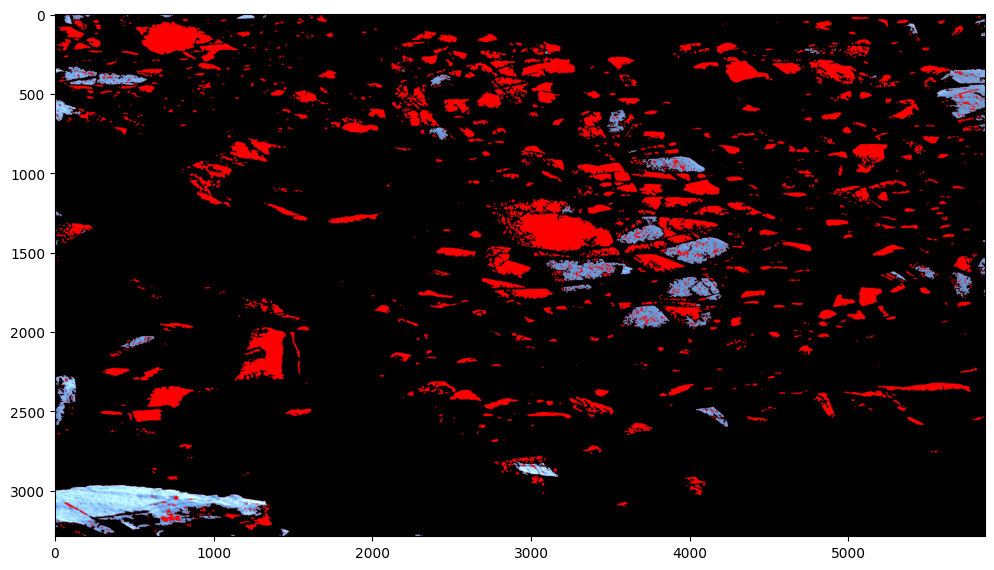

In [6]:
rock_image = processed_image.copy()

# Create the erosion kernel
kernel = np.ones((5,5), np.uint8)
# plt.figure(figsize=(12,10))
# plt.imshow(processed_image)
# plt.show()

# Erode the image
eroded = cv2.erode(rock_image, kernel, iterations=2)
# Dilate the image
dilated = cv2.dilate(eroded,kernel, iterations=1)
# plt.figure(figsize=(12,10))
# plt.imshow(dilated)
# plt.show()


image_edges = dilated.copy()
# plt.figure(figsize=(12,10))
# Convert the image to grayscale
gray = cv2.cvtColor(image_edges, cv2.COLOR_BGR2GRAY)

# Blur the image to reduce noise
# gray = cv2.GaussianBlur(gray, (3,3), 0)

# Define parameters for the Canny edge detector
low_threshold = 200
high_threshold = 300

# Detect edges using the Canny edge detector
edges = cv2.Canny(gray, low_threshold, high_threshold)

# plt.figure(figsize=(12,10))
# plt.imshow(edges, cmap="gray")
# plt.show()
# plt.imsave("results/edge_detection/segmented_rocks.jpg", edges) 

# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and draw and fill them with the desired color
for contour in contours:
    cv2.drawContours(image_edges, [contour], 0, (255,0,0), -1)
#     cv2.drawContours(image_edges, [contour], 0, (random.randint(0,255),random.randint(0,255),random.randint(0,255)), -1)

plt.figure(figsize=(12,10))
plt.imshow(image_edges)
plt.show()
# plt.imsave("results/edge_detection/contours_filled.jpg", image_edges) 

# Extracting the shadows

In [7]:
shadows = processed_image.copy()

image = cv2.cvtColor(shadows, cv2.COLOR_BGR2RGB)

pixels = np.array(image)

(h,w,c) = image.shape
image=image.reshape((h*w,c))

kmeans=KMeans(n_clusters=3)
s=kmeans.fit_predict(image)

/home/ananya/anaconda3/envs/basic/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


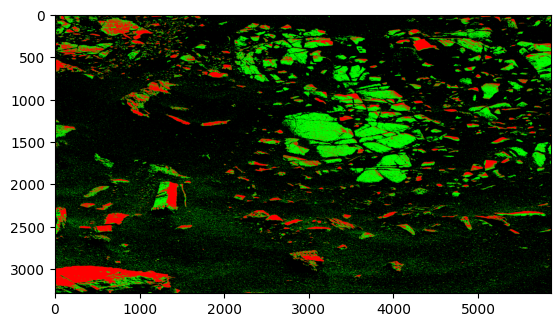

In [8]:
hh=np.array([[ 0,0  , 0],
 [0, 255, 0],
 [255, 0,0]])
rgb_cols = hh.round(0).astype(int)
img_quant = np.reshape(rgb_cols[s],(h,w,c))
plt.imshow(img_quant)
plt.show()
out_image = img_quant.astype(np.uint8)
plt.imsave("results/shadows/rocks_with_shadows.jpg", out_image)

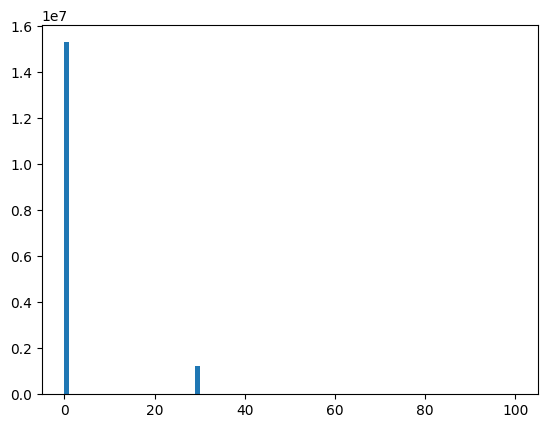

In [163]:
img_out = cv2.cvtColor(out_image, cv2.COLOR_BGR2GRAY)
# plot the histogram of the image
plt.hist(img_out.flat, bins=100, range=(0,100));

# Comparing the two images to segment rocks and bedrocks

## Superimposing with contour

In [1]:

final_image =processed_image.copy()
for contour in contours:
#     print(contour)
    list_of_contours = []
    for val in contour:
        bounding_point = val[0]
        x = bounding_point[0]
        y = bounding_point[1]
        list_of_contours.append([x,y])

#     print(list_of_contours)
    counter_bedrock = 0
    counter_rock = 0
    for point in list_of_contours:
#         print(img_out[point[0]][point[1]])
        if 20 < img_out[point[1]][point[0]] < 40:
            counter_bedrock +=1
        elif img_out[point[1]][point[0]] > 60:
            counter_rock += 1
    if counter_rock != 0 and counter_rock != 0:
        if counter_bedrock/counter_rock > 0.3:
#             print("yes")
            cv2.drawContours(final_image, [contour], 0, (255,0,0), -1)
        else:
#             print("no")
            cv2.drawContours(final_image, [contour], 0, (0,255,0), -1)
    elif counter_bedrock == 0:
        print("one value is zero", counter_rock, counter_bedrock)
        cv2.drawContours(final_image, [contour], 0, (0,255,0), -1)
            
    
plt.imshow(final_image)
plt.show()
plt.imsave("results/shadows/seg_rocks_and_bedrocks.jpg", final_image)

NameError: name 'processed_image' is not defined

## Superimposing with KNN

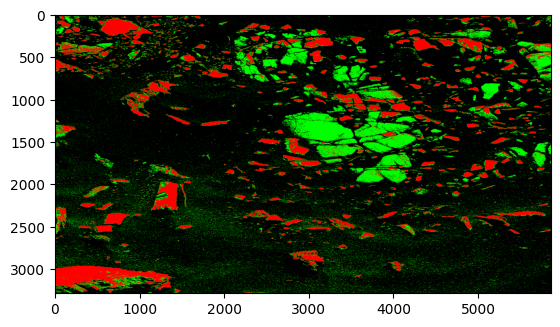

In [176]:
post_process = final_image.copy()
knn_image = out_image.copy()

for i in range(post_process.shape[0]):
    for j in range(post_process.shape[1]):
#         print(post_process[i][j])
        if post_process[i][j][0] != 0 and post_process[i][j][1] != 0 and post_process[i][j][2] != 0:
            post_process[i][j][0] = knn_image[i][j][0]
            post_process[i][j][1] = knn_image[i][j][1]
            post_process[i][j][2] = knn_image[i][j][2]
        elif post_process[i][j][0] != 255 and post_process[i][j][1] != 0 and post_process[i][j][2] != 0:
            post_process[i][j][0] = knn_image[i][j][0]
            post_process[i][j][1] = knn_image[i][j][1]
            post_process[i][j][2] = knn_image[i][j][2]
#             print(post_process[i][j], knn_image[i][j])
        elif post_process[i][j][0] != 0 and post_process[i][j][1] != 255 and post_process[i][j][2] != 0:
            post_process[i][j][0] = knn_image[i][j][0]
            post_process[i][j][1] = knn_image[i][j][1]
            post_process[i][j][2] = knn_image[i][j][2]

plt.imshow(post_process)
plt.imsave("results/shadows/rock_with_bedrock_after_knn.jpg", post_process)

# Merging the 3 classes in the same image

In [2]:
# Create the erosion kernel
kernel = np.ones((5,5), np.uint8)
# plt.figure(figsize=(12,10))
# plt.imshow(processed_image)
# plt.show()

# Erode the image
eroded_rocks = cv2.erode(post_process, kernel, iterations=2)
# Dilate the image
dilated_rocks = cv2.dilate(eroded_rocks,kernel, iterations=1)
plt.figure(figsize=(12,10))
plt.imshow(dilated_rocks)
plt.show()

final_Seg = dilated_rocks.copy()
for i in range(final_Seg.shape[0]):
    for j in range(final_Seg.shape[1]):
        if final_Seg[i][j][0] == 0 and final_Seg[i][j][1] == 0 and final_Seg[i][j][2] == 0:
#             print(final_Seg[i][j])
            #giving the class sand blue color
            final_Seg[i][j] = [106,90,205]
plt.figure(figsize=(12,10))
plt.imshow(final_Seg)
plt.show()
plt.imsave("results/final_seg/all_done.jpg", final_Seg)

NameError: name 'np' is not defined

# Comparing the entire polygon to find the percentage of shadow
- resource exhaustive
- just comparing with the boundaries is sufficient

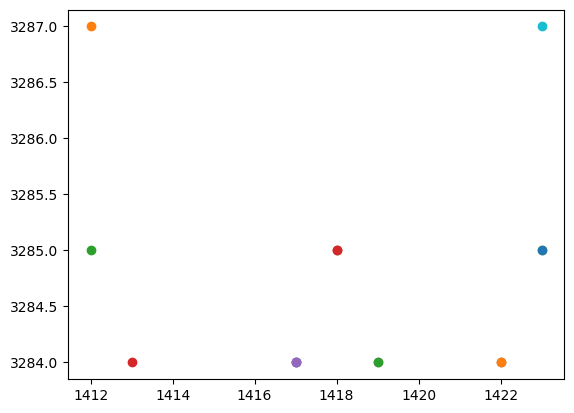

[[1417, 3284], [1412, 3287], [1412, 3285], [1413, 3284], [1417, 3284], [1418, 3285], [1419, 3284], [1422, 3284], [1423, 3285], [1423, 3287], [1423, 3285], [1422, 3284], [1419, 3284], [1418, 3285], [1417, 3284]]
[<POINT (1412 3285)>, <POINT (1412 3286)>, <POINT (1412 3287)>, <POINT (1413 3284)>, <POINT (1413 3285)>, <POINT (1413 3286)>, <POINT (1414 3284)>, <POINT (1414 3285)>, <POINT (1415 3284)>, <POINT (1415 3285)>, <POINT (1416 3284)>, <POINT (1417 3284)>, <POINT (1418 3285)>, <POINT (1419 3284)>, <POINT (1420 3284)>, <POINT (1421 3284)>, <POINT (1422 3284)>, <POINT (1423 3285)>, <POINT (1423 3286)>, <POINT (1423 3287)>] done


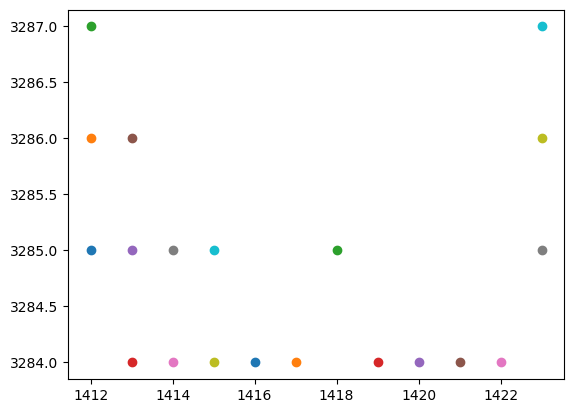

In [132]:
for contour in contours:
#     print(contour)
    list_of_contours = []
    for val[0] in contour:
        bounding_point = val[0]
        x = bounding_point[0]
        y = bounding_point[1]
        plt.scatter(x,y)
        list_of_contours.append([x,y])
    plt.show()

    print(list_of_contours)


    p = Polygon(list_of_contours)
    xmin, ymin, xmax, ymax = p.bounds
    x = np.arange(np.floor(xmin), np.ceil(xmax) + 1)  # array([0., 1., 2.])
    y = np.arange(np.floor(ymin), np.ceil(ymax) + 1)  # array([0., 1., 2.])
    points = MultiPoint(np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]))
    inner_points = points.intersection(p)
    print(list(inner_points.geoms), "done")

    for point in list(inner_points.geoms):
#         print(point)
        x = point.x
        y = point.y
        plt.scatter(x,y)
    plt.show()
    break

# Extract the coordinates of the polygons (detected contours)

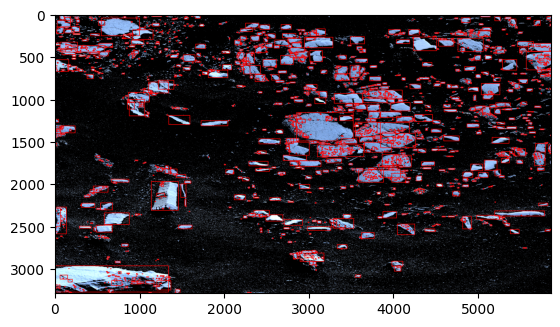

In [81]:
check = processed_image.copy()
for c in contours:
    # get bounding rect
    (x,y,w,h) = cv2.boundingRect(c)
    # draw red rect
    cv2.rectangle(check, (x,y), (x+w,y+h), (255, 0, 0), 5)
plt.imshow(check)
plt.show()
plt.imsave("results/edge_detection/contours_with_rectangles.jpg", check)